In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import swarmplot
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pmdarima as pm
#from fbprophet import Prophet

import xgboost as xgb


from pandas import to_datetime
from pmdarima.model_selection import train_test_split
from numpy import *

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

%matplotlib inline

import random
from numpy import * 
from sklearn.metrics import roc_curve, auc

import itertools
import warnings
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error, mean_absolute_percentage_error


warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [2]:
def load_demand_full_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/model_data_v4.csv"))

In [3]:
dem_data = load_demand_full_data()

In [4]:
dem_data.head()

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
0,2010,1,2010-01-01,20.868008,1.6,41.1,16.380645,25.858065,144.511358,8941.450389,13765.04,10613.530000,6554083.135,28278.392,7110454,44504.25
1,2010,2,2010-02-01,20.218907,3.2,35.4,16.146429,24.682143,124.982743,8855.467677,13377.27,10380.667857,5831325.465,32153.986,7119405,44504.25
2,2010,3,2010-03-01,19.828286,6.3,34.7,15.496774,24.725806,106.809763,8698.725127,11991.47,10132.978710,6319623.805,38195.588,7128356,44504.25
3,2010,4,2010-04-01,17.593856,6.5,29.9,12.780000,23.063333,68.136038,8452.863411,11436.13,9804.072333,5984627.295,45142.723,7133668,44504.25
4,2010,5,2010-05-01,15.323485,3.1,28.4,11.187097,19.596774,123.937772,8897.770510,12386.49,10558.023548,6459781.390,54370.332,7138980,44504.25


In [5]:
dem_data_excl2021 = dem_data.drop(dem_data[dem_data['year'] == 2021].index)

In [6]:
dem_data_excl2021.tail()

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
127,2020,8,2020-08-01,14.613374,2.2,27.8,9.093548,20.074194,130.397917,7827.362594,11500.53,9764.800000,5823557.770,2969007.614,8102807,56109.666667
128,2020,9,2020-09-01,16.460153,4.9,30.5,11.330000,21.723333,81.650543,7326.909750,11721.16,9027.053000,5268048.110,3054829.298,8098905,56109.666667
129,2020,10,2020-10-01,17.598051,7.0,30.2,13.467742,21.980645,68.068750,7340.289409,11920.34,8757.940323,5461175.320,3137388.115,8097370,56109.666667
130,2020,11,2020-11-01,20.184861,6.5,40.4,14.886667,25.863333,114.450000,7584.268118,12401.82,9291.636333,5460673.045,3234844.871,8095835,56109.666667
131,2020,12,2020-12-01,19.403831,5.2,32.3,15.470968,24.016129,104.077083,7300.258421,10863.32,8608.121290,5431392.265,3340420.498,8094300,56109.666667


In [7]:
peakDemand = dem_data_excl2021.drop([ 'year', 'month', 'date','temp_mean', 'temp_min', 'temp_max', 'demand_mean','temp_avg_daily_min','demand_max', 'total_consumption', 'gsp','degree_days'], axis=1)

In [8]:
peakDemand.head()

,temp_avg_daily_max,demand_avg_daily_max,pv_capacity,population
0,25.858065,10613.530000,28278.392,7110454
1,24.682143,10380.667857,32153.986,7119405
2,24.725806,10132.978710,38195.588,7128356
3,23.063333,9804.072333,45142.723,7133668
4,19.596774,10558.023548,54370.332,7138980


In [9]:
peakDemand.tail()

,temp_avg_daily_max,demand_avg_daily_max,pv_capacity,population
127,20.074194,9764.800000,2969007.614,8102807
128,21.723333,9027.053000,3054829.298,8098905
129,21.980645,8757.940323,3137388.115,8097370
130,25.863333,9291.636333,3234844.871,8095835
131,24.016129,8608.121290,3340420.498,8094300


In [10]:
peakDemand_w_DD = dem_data_excl2021.drop([ 'year', 'month', 'date','temp_mean', 'temp_min', 'temp_max', 'demand_mean','demand_max', 'total_consumption', 'gsp','temp_avg_daily_max','temp_avg_daily_min'], axis=1)

In [11]:
peakDemand_w_DD.head()

,degree_days,demand_avg_daily_max,pv_capacity,population
0,144.511358,10613.530000,28278.392,7110454
1,124.982743,10380.667857,32153.986,7119405
2,106.809763,10132.978710,38195.588,7128356
3,68.136038,9804.072333,45142.723,7133668
4,123.937772,10558.023548,54370.332,7138980


In [12]:
peakDemand_w_DD.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand_W_DD.txt"),  sep=',', index=False, header=None)

In [13]:
peakDemand.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand.txt"),  sep=',', index=False, header=None)

In [14]:

# min_max = MinMaxScaler()

# peakDemand_min_max = min_max.fit_transform(peakDemand)
# peakDemand_w_DD_min_max = min_max.fit_transform(peakDemand_w_DD)

In [15]:
# scaled_df_peakDemand = pd.DataFrame(peakDemand_min_max, columns=[ 'temp_avg_daily_max', 'demand_avg_daily_max',
#        'pv_capacity', 'population'])

In [16]:
# scaled_df_peakDemand_w_DD_min_max = pd.DataFrame(peakDemand_w_DD_min_max, columns=['degree_days', 'demand_avg_daily_max',
#        'pv_capacity', 'population'])

## Linear Regression - Peak Demand 

In [17]:
datafile = "C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand.txt"

In [18]:
def get_data(datafile, normalise, i): 

    data_in = genfromtxt(datafile, delimiter=",") # in case of csv data
 

    data_inputx = data_in[:,[0,2,3]]  # three features   

    if normalise == True:
        transformer = MinMaxScaler().fit(data_inputx)  # fit does nothing.
        data_inputx = transformer.transform(data_inputx)
 


    data_inputy = data_in[:,1] # this is target - second column from the data

    percent_test = 0.4
    testsize = int(percent_test * data_inputx.shape[0]) 
    x_train = data_inputx[:-testsize]
    x_test = data_inputx[-testsize:] 
    y_train = data_inputy[:-testsize]
    y_test = data_inputy[-testsize:]


    #another way you can use scikit-learn train test split with random state
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=i)

    return x_train, x_test, y_train, y_test

In [19]:
def scikit_linear_mod(x_train, x_test, y_train, y_test): 
 
    regr = linear_model.LinearRegression()

 
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    rsquared = r2_score(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)*100
 
    residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1)
 
    plt.savefig('scikit_linear.png')
    plt.show()

    sns.regplot(x=y_test,y=y_pred,ci=None,color ='orange');
    plt.xlabel('Actual');
    plt.ylabel('Predicted');
    plt.savefig('regression_plot_2 features.png')
    plt.show()
    
    return rmse, rsquared, MAPE, regr.coef_

## Linear Regression (Peak Demand) - One Test without Normalisation

In [20]:
# normalise = False
# x_train, x_test, y_train, y_test = get_data(datafile, normalise, 1)
# rmse, rsquared, coef, MAPE = scikit_linear_mod(x_train, x_test, y_train, y_test)
# print('RMSE:', rmse)
# print('R-Squared:', rsquared)
# print('Coefficients:', coef)
# print('MAPE:', str(MAPE) + str(' %'))


## Linear Regression (Peak Demand) - One Test with Normalisation

In [21]:
# normalise = True
# x_train, x_test, y_train, y_test = get_data(datafile, normalise, 1)
# rmse, rsquared, MAPE, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
# print('RMSE:', rmse)
# print('R-Squared:', rsquared)
# print('MAPE:', str(MAPE) + str(' %'))
# print('Coefficients:', coef)


## Linear Regression (Peak Demand) - 30 runs with Normalisation

max_exp = 30
rmse_list = np.zeros(max_exp)
rsq_list = np.zeros(max_exp)

for i in range(0,max_exp):

    x_train, x_test, y_train, y_test = get_data(datafile, normalise, i)
    rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)

    rmse_list[i] = rmse
    rsq_list[i] = rsquared 


print('\n List of RMSE:\n', rmse_list)
# Explained variance score: 1 is perfect prediction 
print('\n List of R^2:\n', rsq_list)

mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)

mean_rsq = np.mean(rsq_list)
std_rsq = np.std(rsq_list)

print('\n mean_rmse: ', mean_rmse, '\n std_rmse:', std_rmse)
print('\n mean_rsq:', mean_rsq, '\n std_rsq:', std_rsq )

### Linear Model (Peak Demand) with regularisation, Random Forest Regressor and Gradient Boosting Regressor Models 

In [22]:
# X = peakDemand.iloc[:,[0,2,3]].values
# transformer = MinMaxScaler().fit(X)  # fit does nothing.
# X = transformer.transform(X)
# y = peakDemand.iloc[:, 1].values

In [23]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:

# pipelines={
# 'rf':make_pipeline(RandomForestRegressor(random_state=1)),
# 'gb':make_pipeline(GradientBoostingRegressor(random_state=1)),
# 'ridge':make_pipeline(Ridge(random_state=1)),
# 'lasso':make_pipeline(Lasso(random_state=1)),
# 'enet':make_pipeline(ElasticNet(random_state=1)),
# }

In [25]:
# hyperparagrid={
# 'rf':{
# 'randomforestregressor__min_samples_split':[2,4,6],
# 'randomforestregressor__min_samples_leaf':[1,2,3]
# },
    
# 'gb':{
#     'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
# },

# 'ridge':{
#     'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
# },
# 'lasso':{
#     'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
# },
# 'enet':{
#     'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
# }

# }

In [26]:
# fit_models={}
# for algo,pipeline in pipelines.items():
#     model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
#     try:
#         print('Start training for {}'.format(algo))
#         model.fit(X_train,y_train)
#         fit_models[algo]=model
#     except NotFittedError as e:
#         print(repr(e))

In [27]:
for algo,model in fit_models.items():
    ya=model.predict(X_test)
    print('{} scores-R2:{} RMSE:{} MAPE:{}'.format(algo,r2_score(y_test,ya), np.sqrt(mean_squared_error(y_test,ya)), mean_absolute_percentage_error(y_test, ya)*100))

In [28]:
# best_model=fit_models['rf']

In [29]:
# best_model

# Linear Regression using Peak Demand with Degree Days

In [30]:
datafile = "C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand_W_DD.txt"

## Linear Regression using Peak Demand with Degree Days - One test without Normalisation

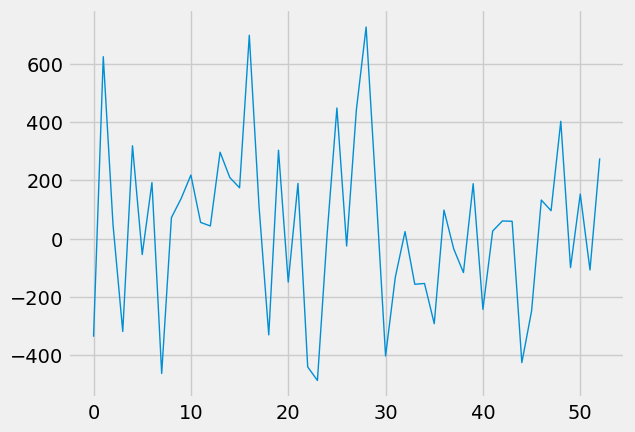

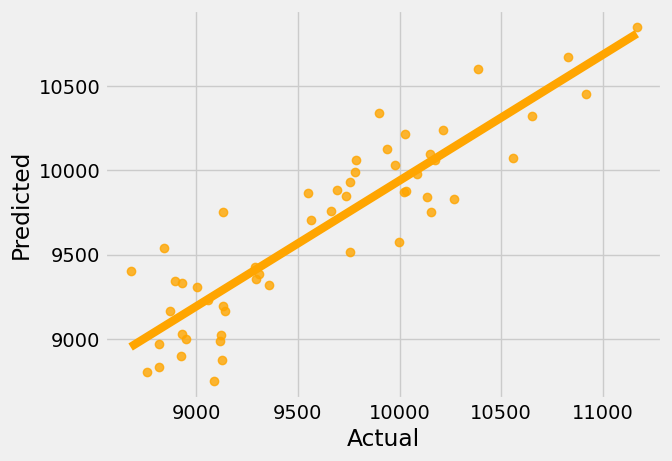

RMSE: 286.0002516522885
R-Squared: 0.7891355070525282
Coefficients: [ 1.40278678e+01  2.63796189e-04 -1.35598889e-03]
MAPE: 2.365261667084313 %


In [32]:
normalise = False
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 1)
rmse, rsquared, MAPE, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)
print('MAPE:', str(MAPE) + str(' %'))

## Linear Regression using Mean Demand - One test with Normalisation

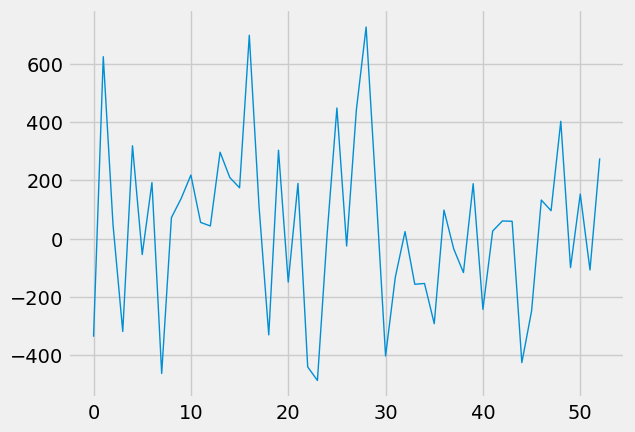

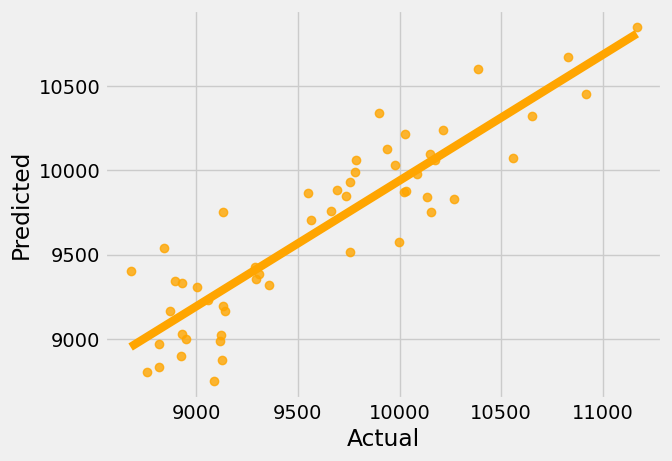

RMSE: 286.0002516522883
R-Squared: 0.7891355070525286
Coefficients: [ 1831.96367837   873.7304655  -1358.08659989]
MAPE: 2.3652616670843107 %


In [33]:
normalise = True
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 1)
rmse, rsquared, MAPE, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)
print('MAPE:', str(MAPE) + str(' %'))

## Linear Regression using Mean Demand - 30 experimental runs with Normalisation

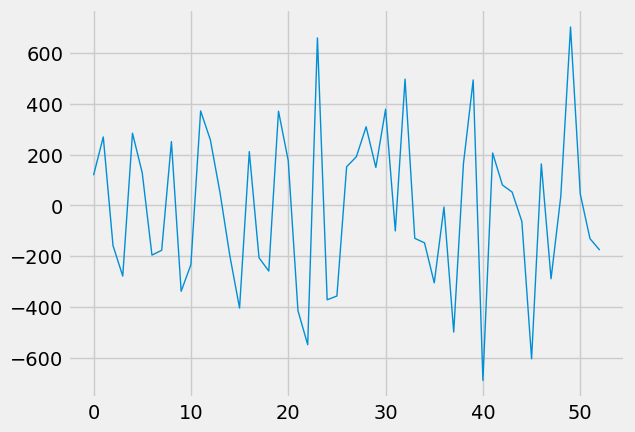

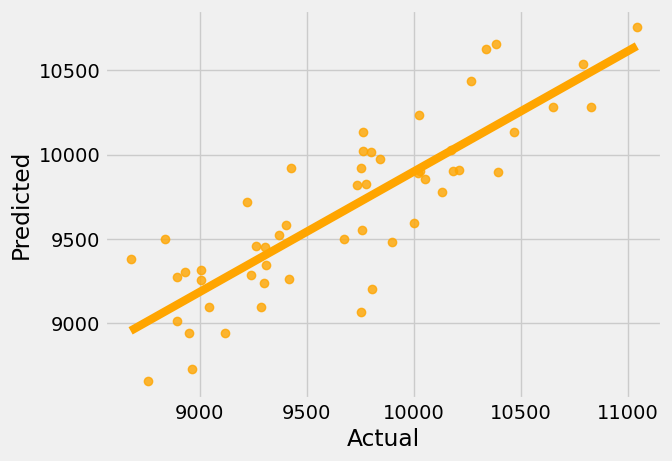

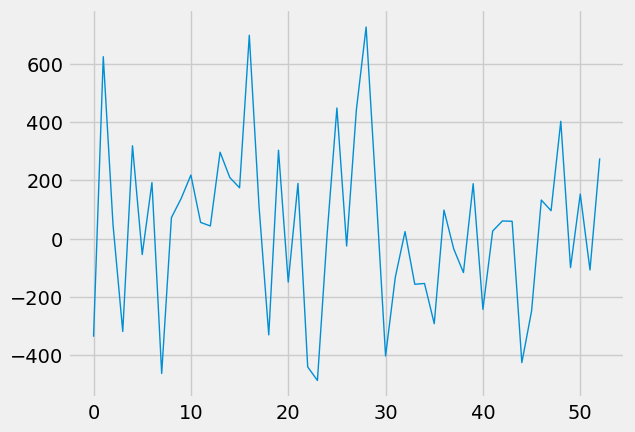

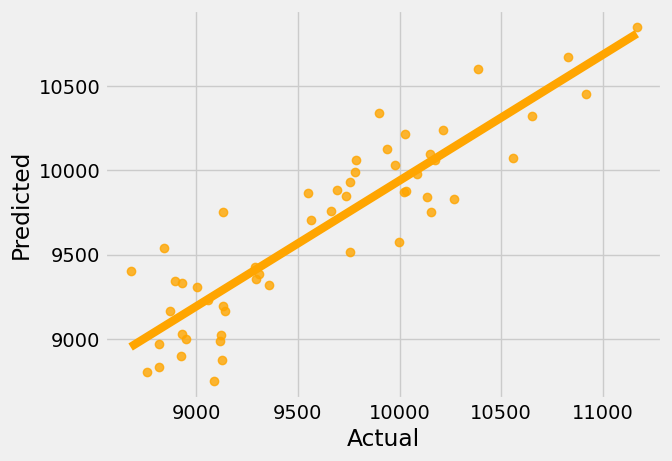

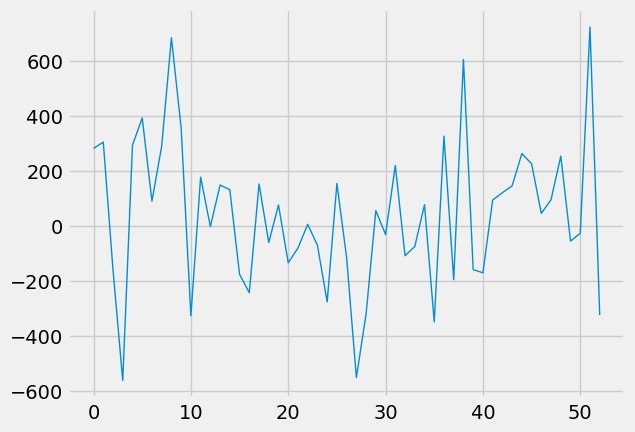

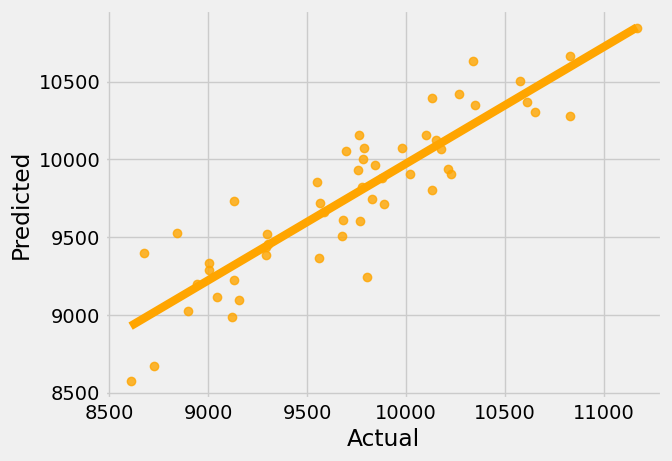

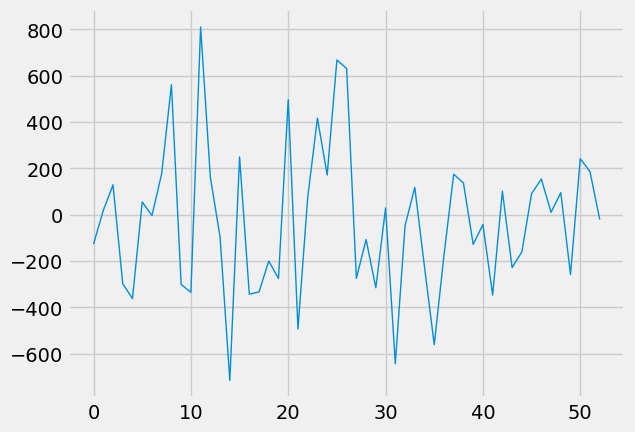

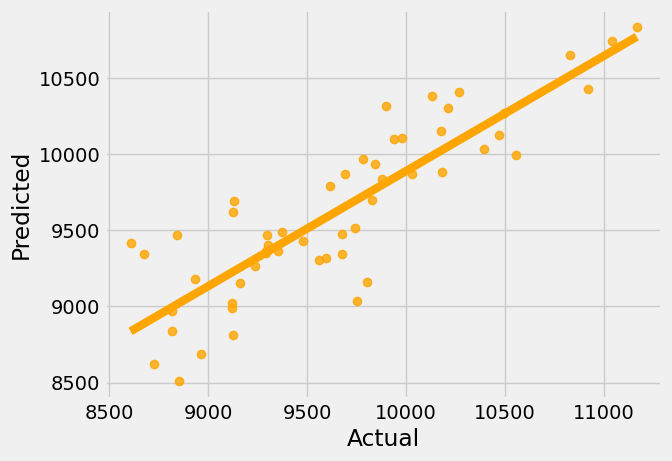

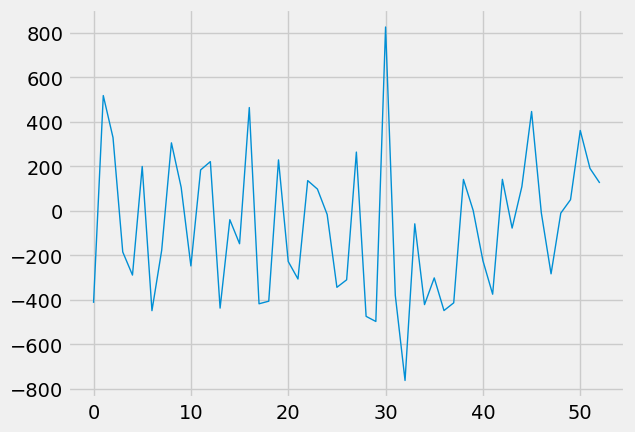

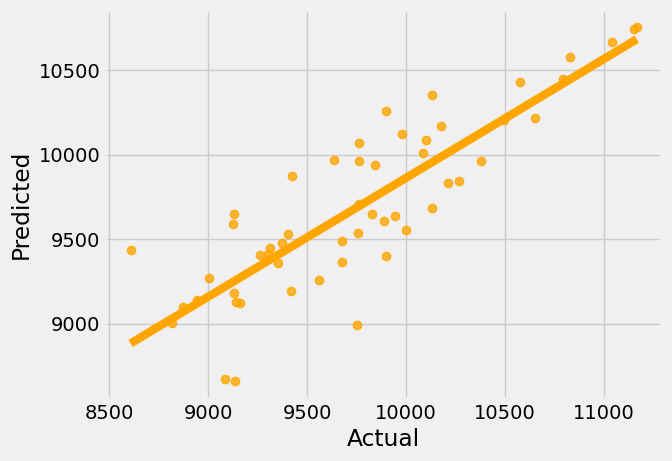

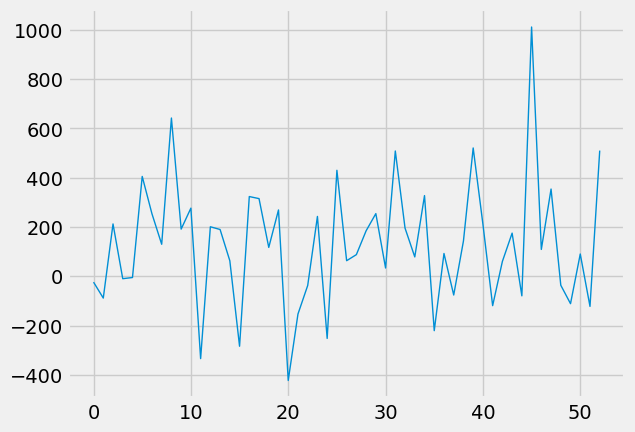

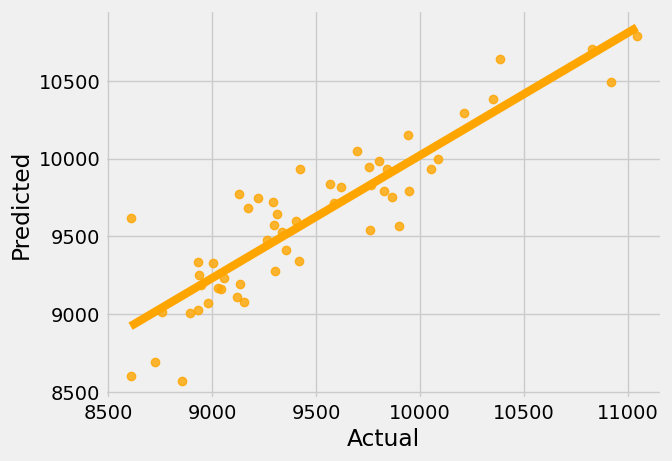

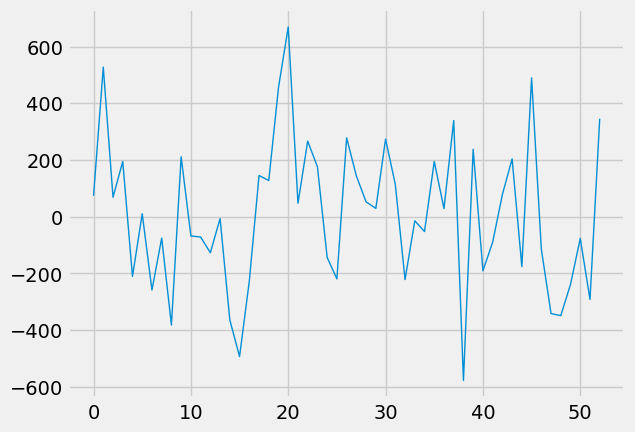

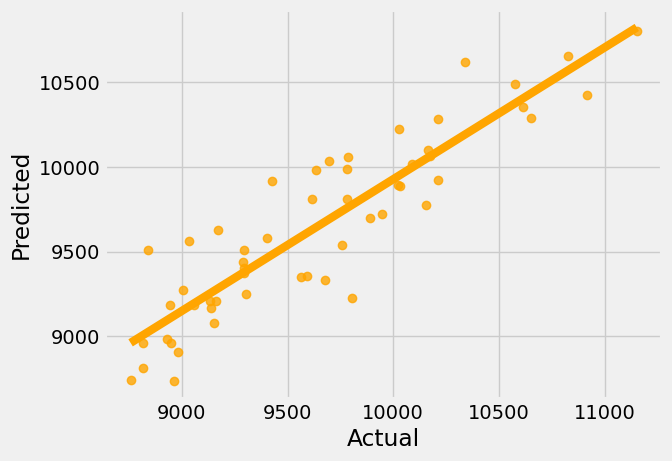

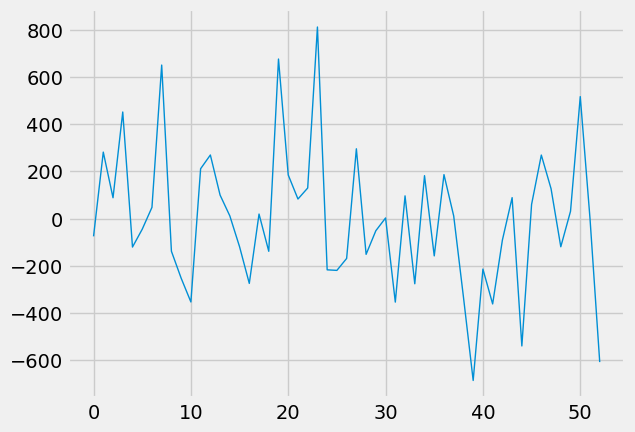

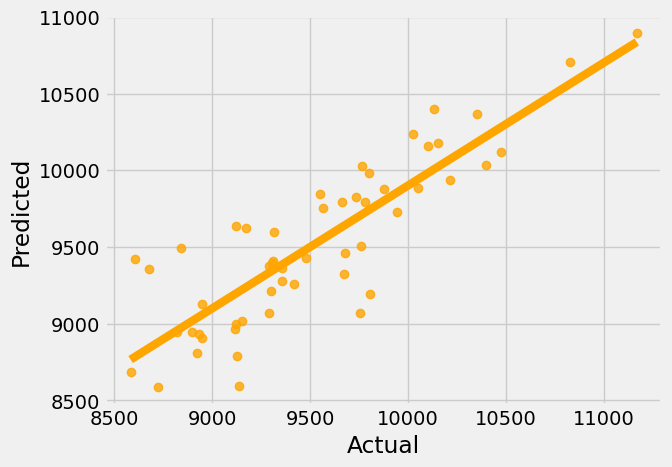

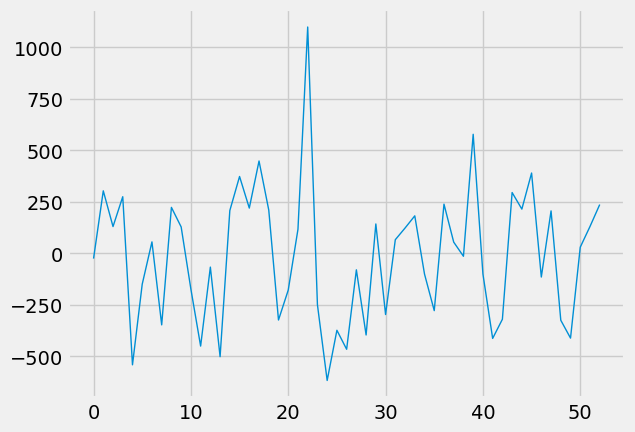

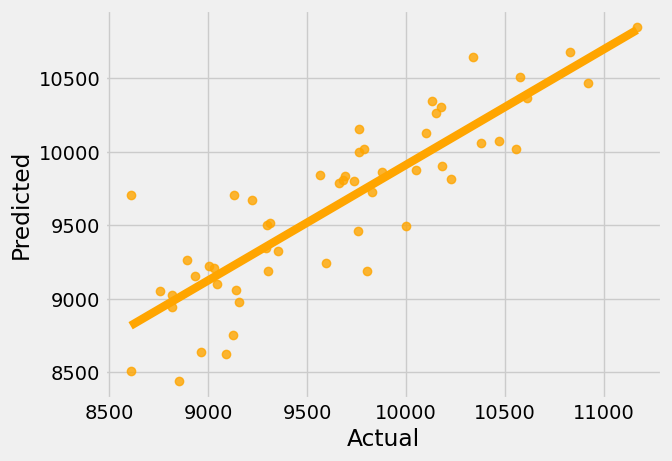

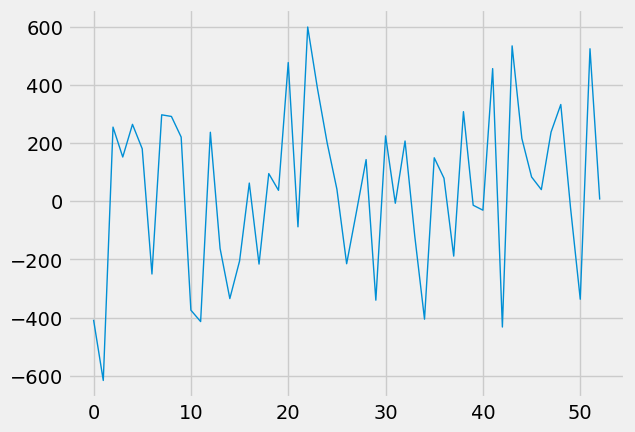

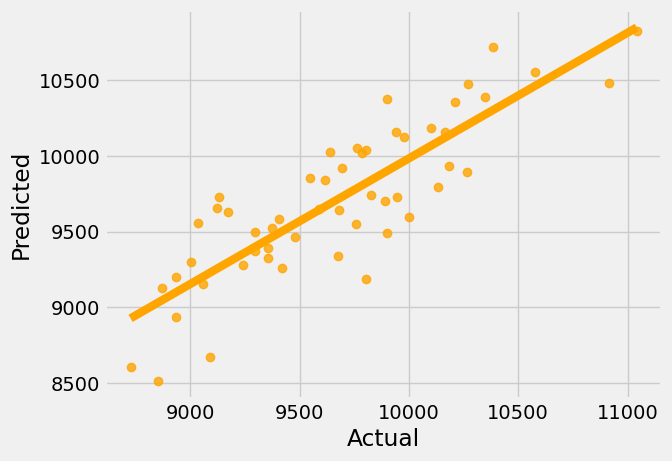

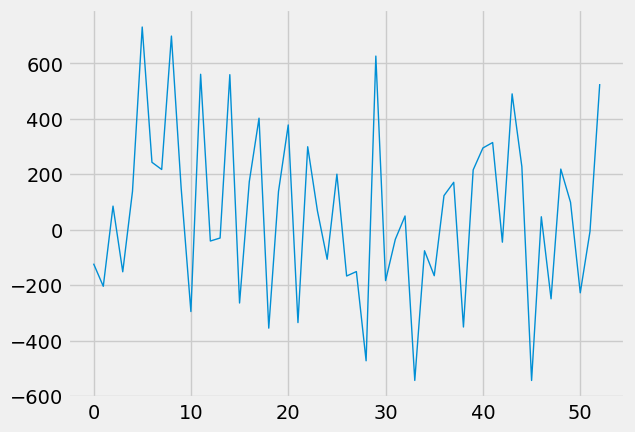

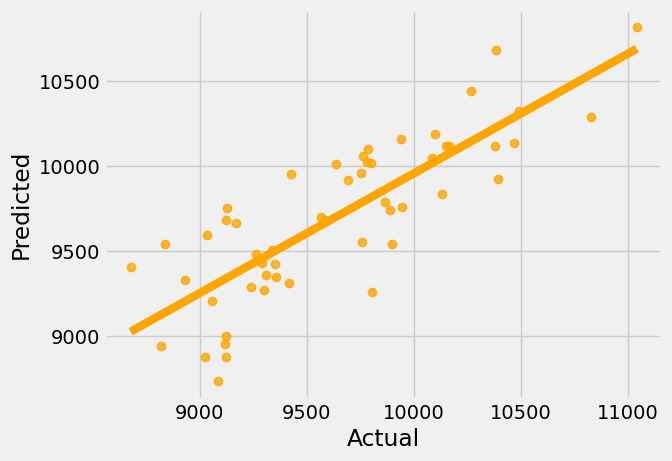

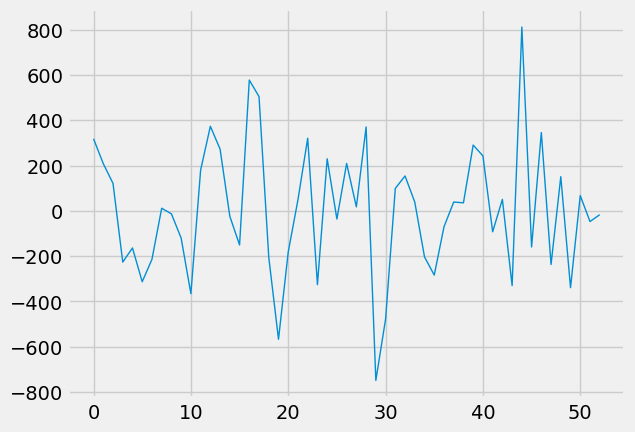

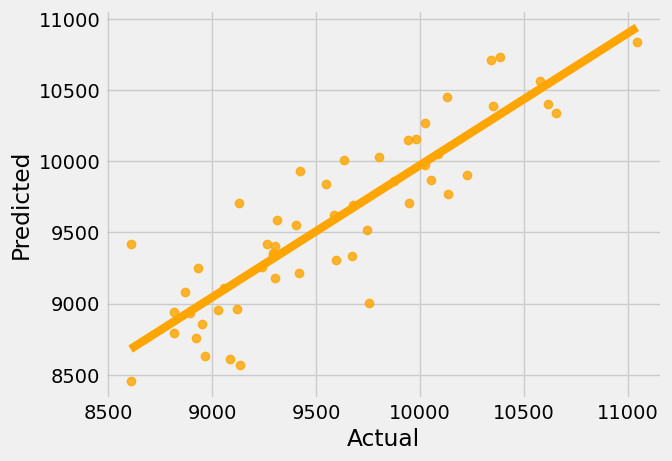

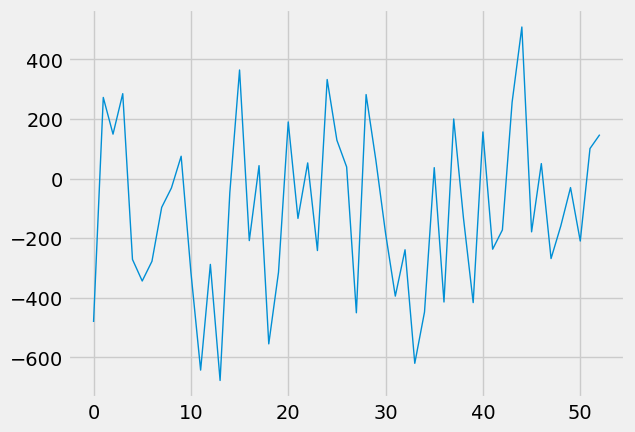

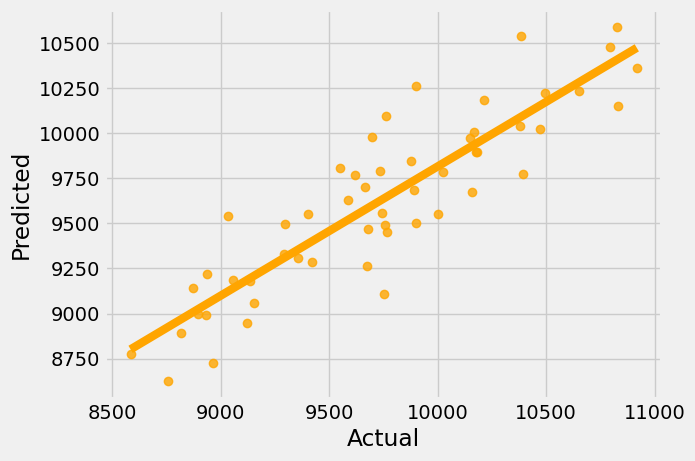

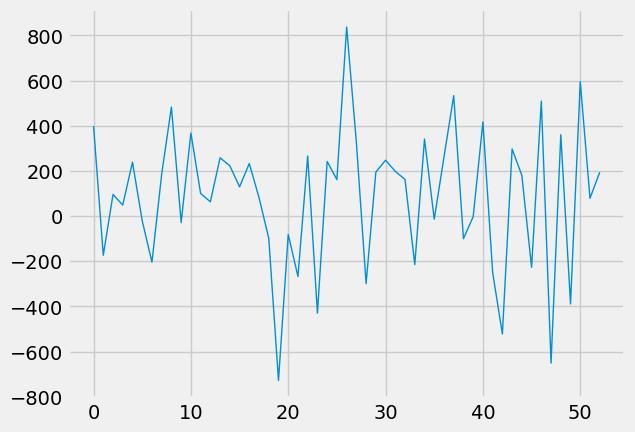

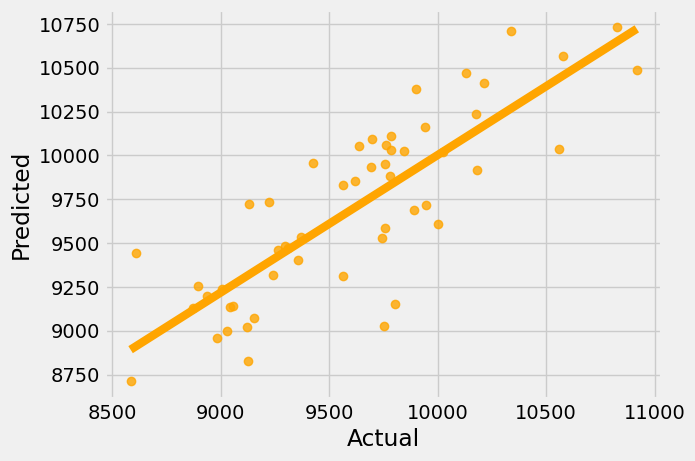

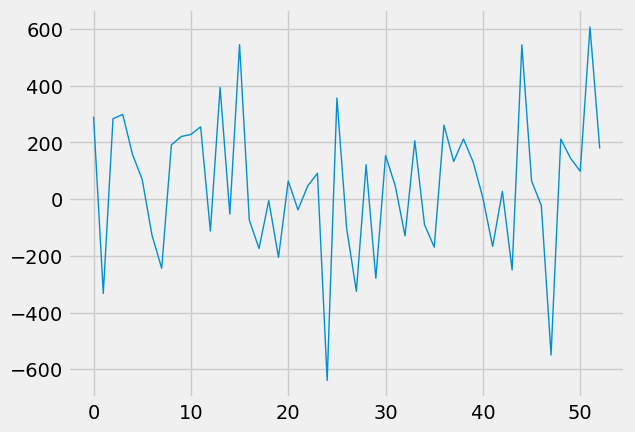

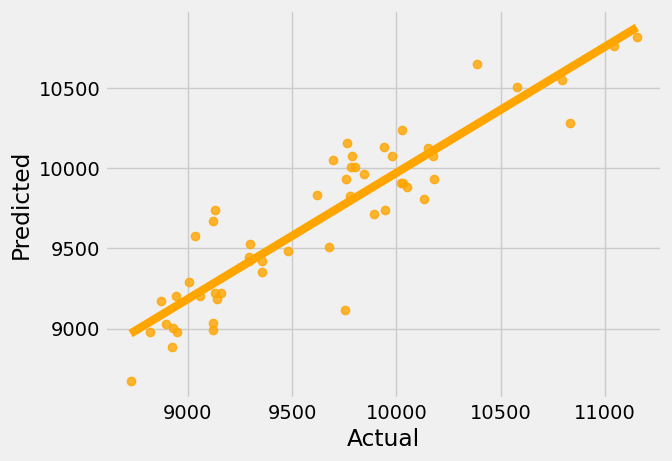

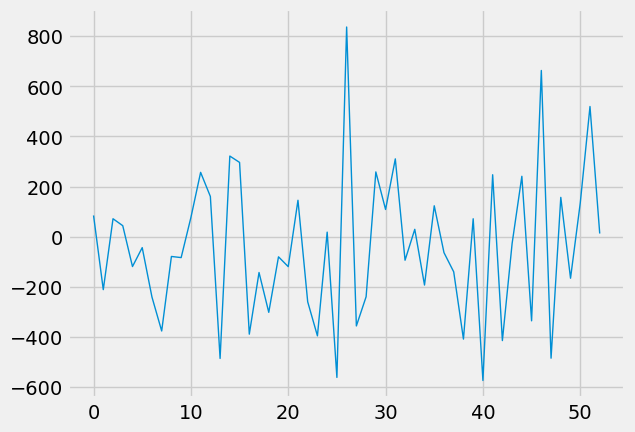

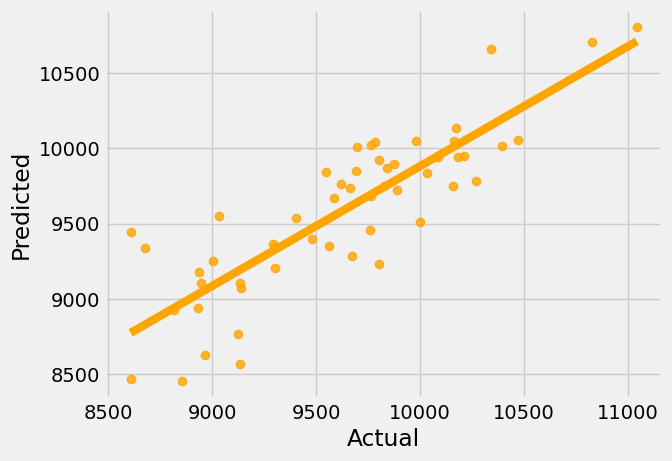

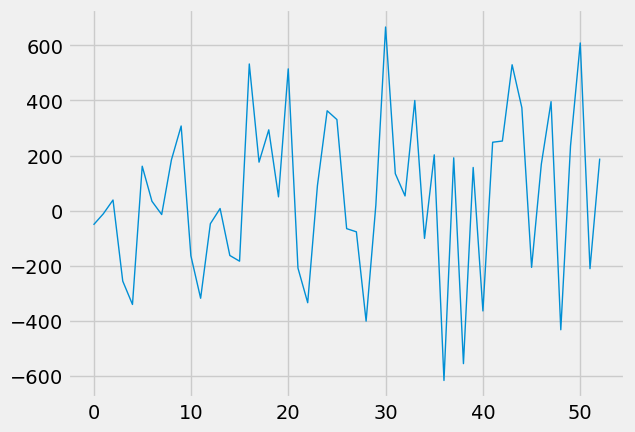

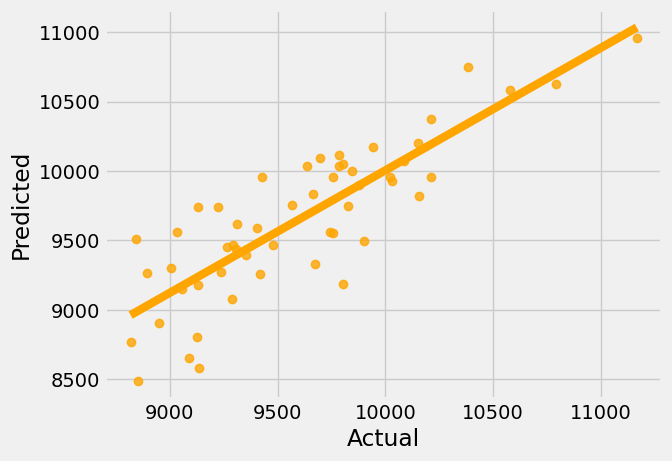

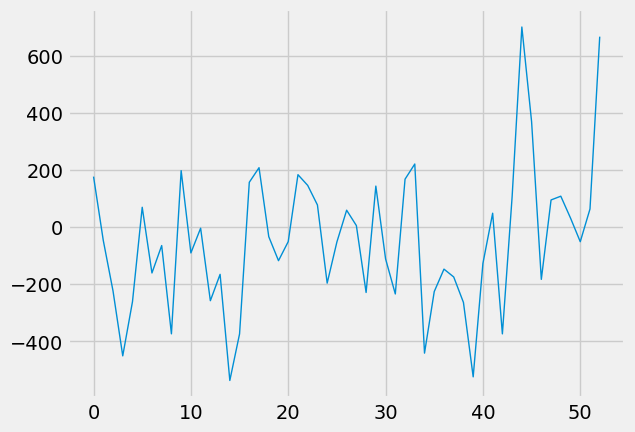

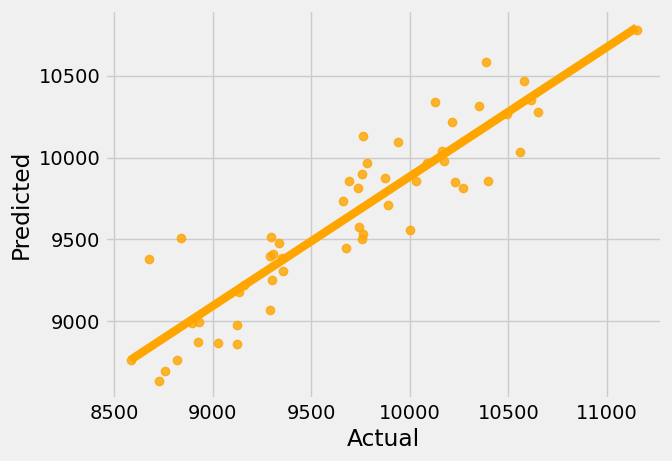

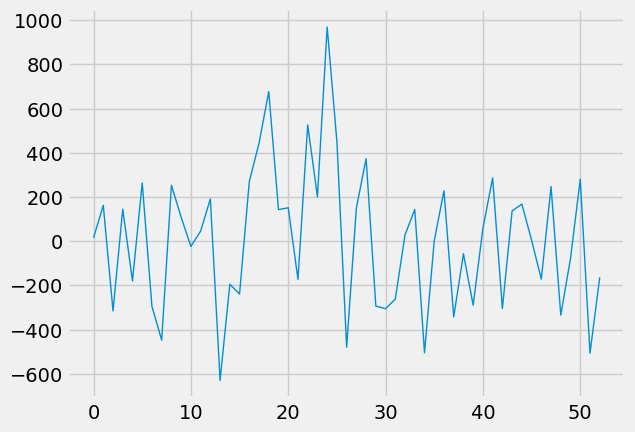

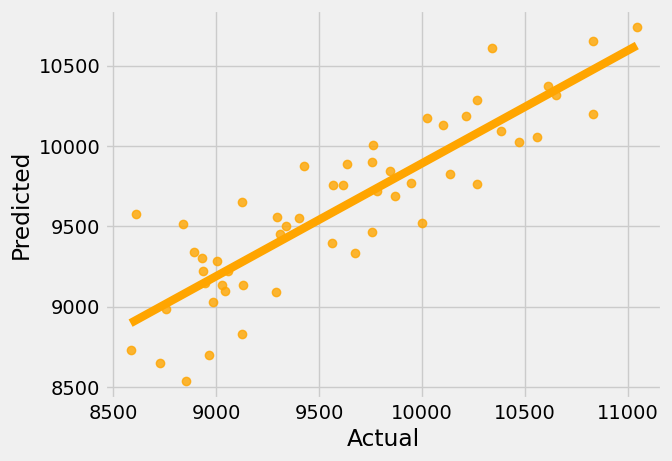

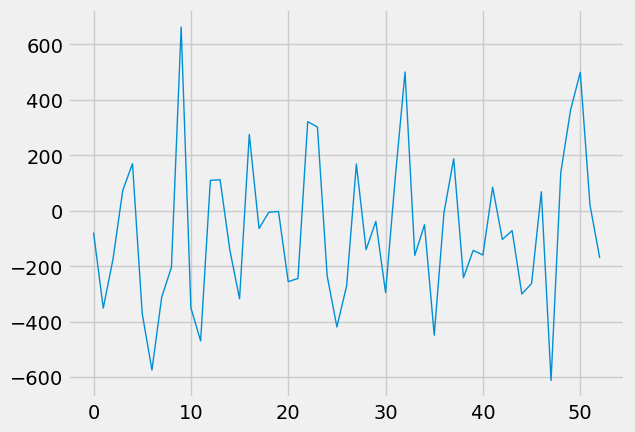

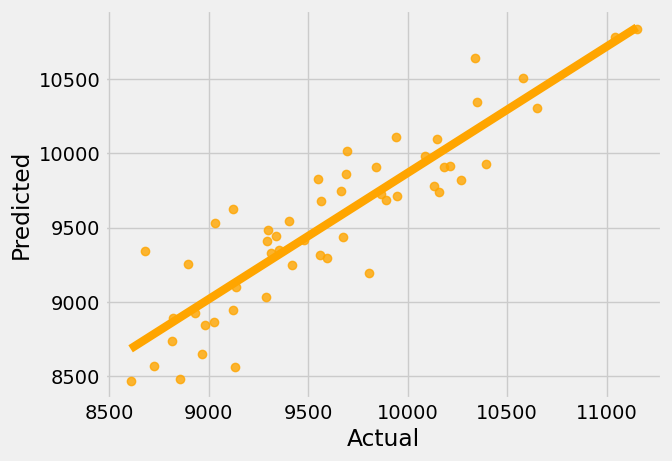

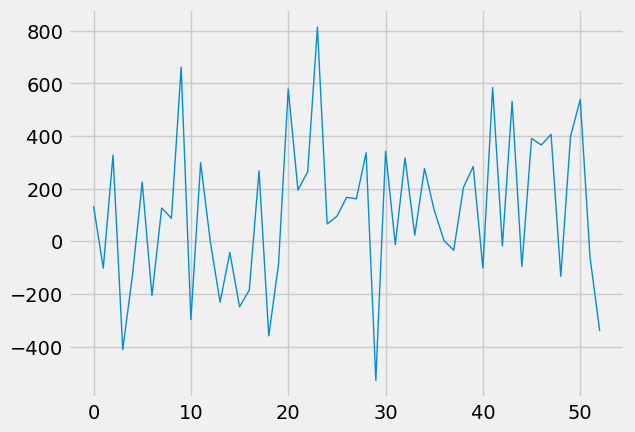

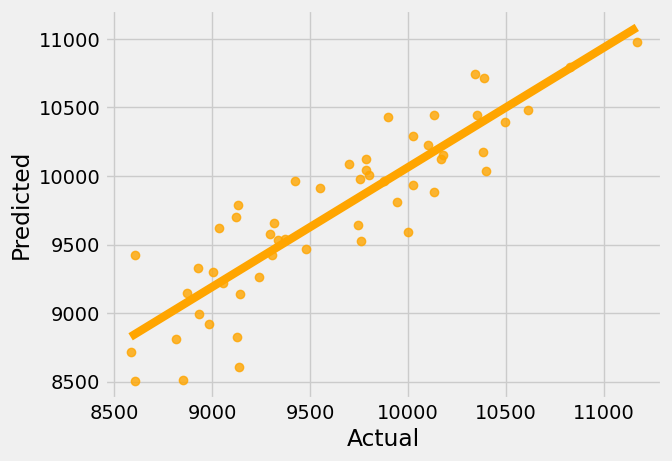

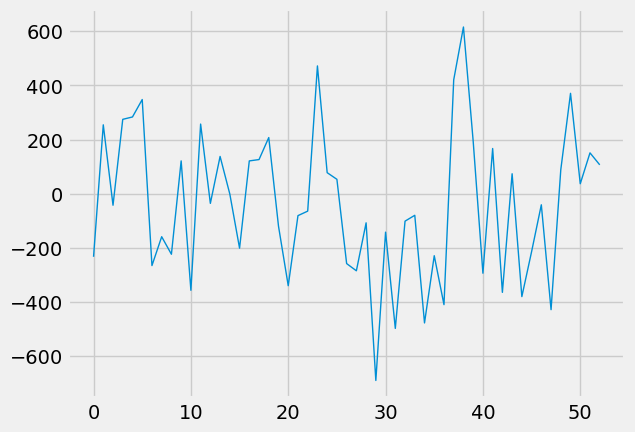

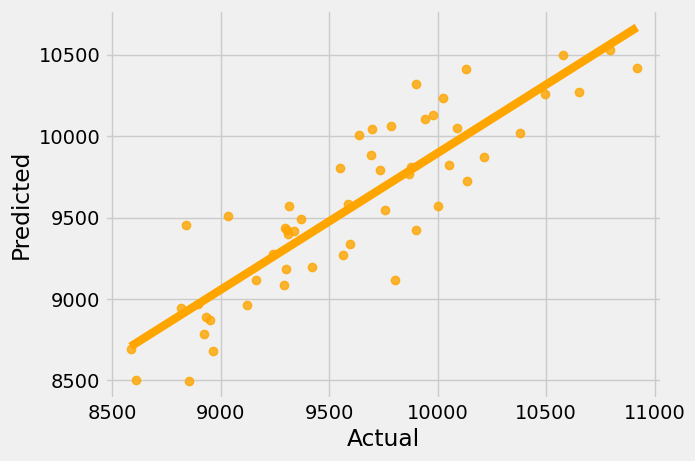

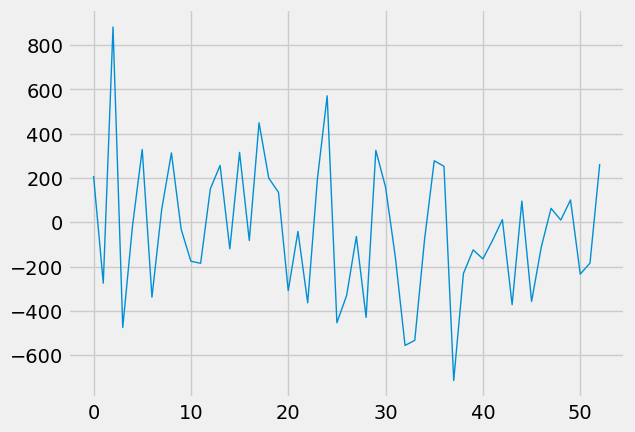

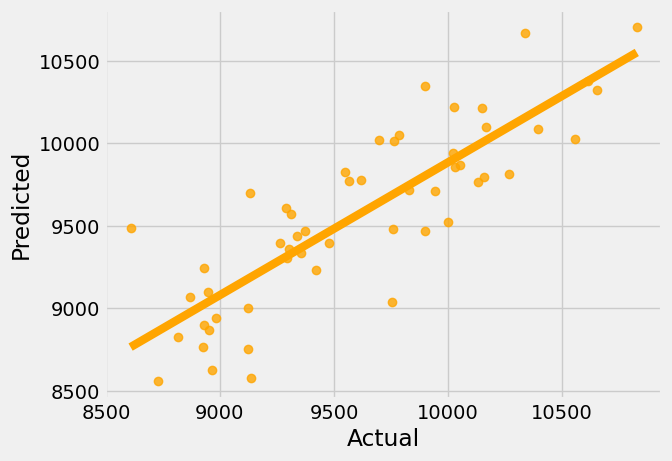

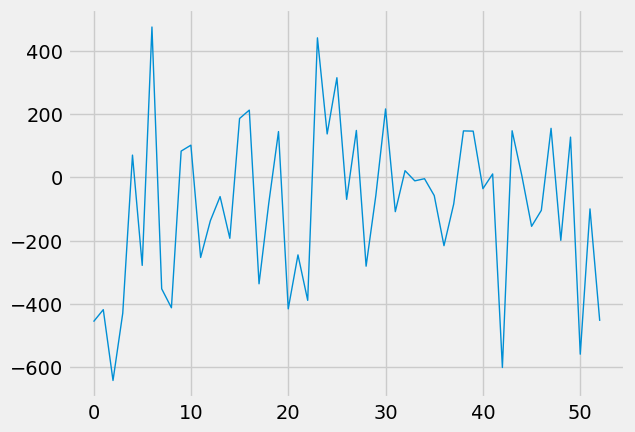

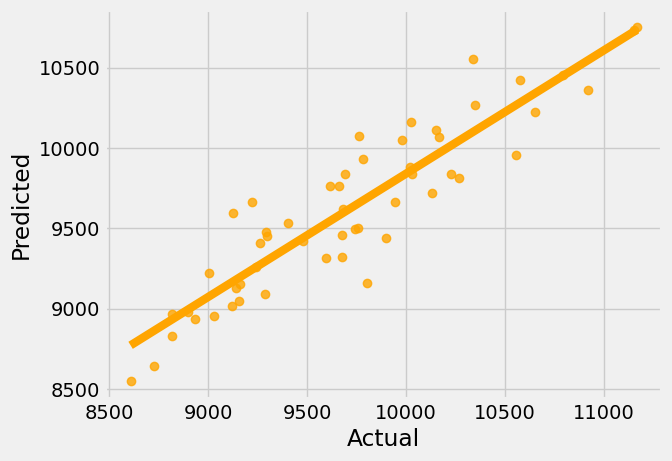

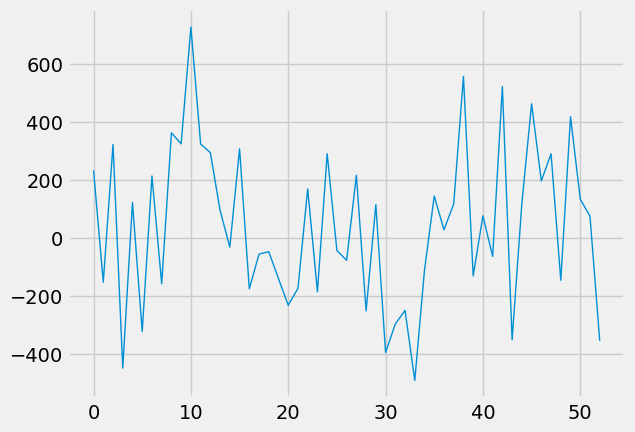

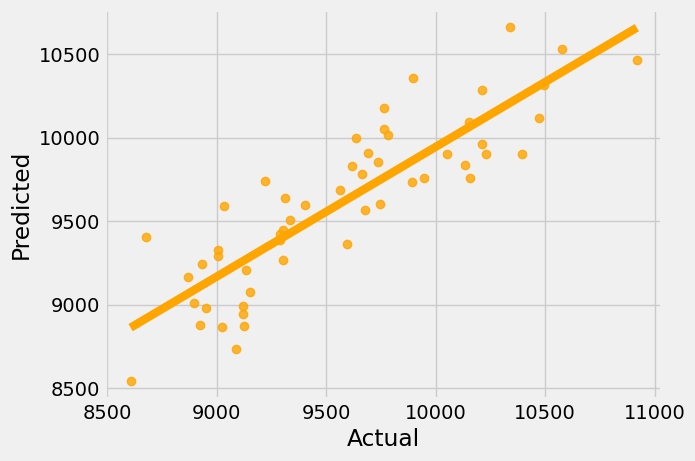

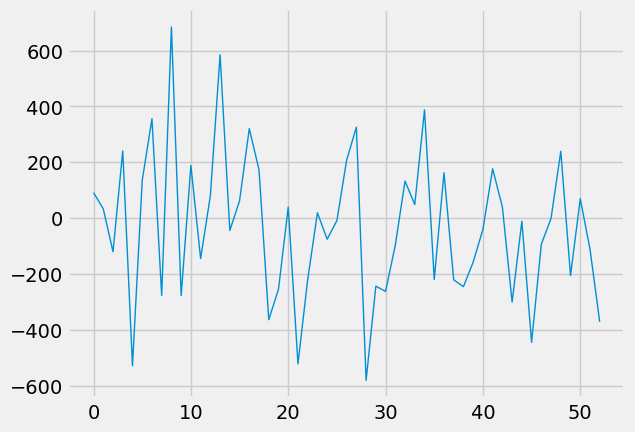

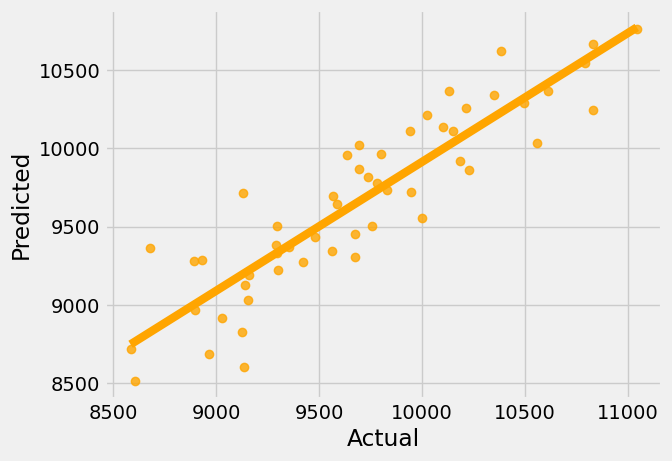

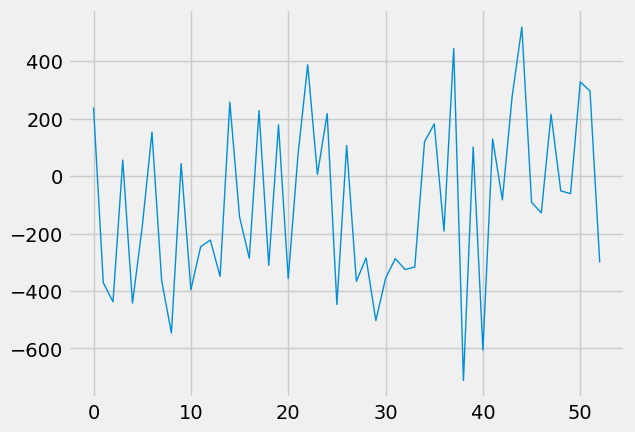

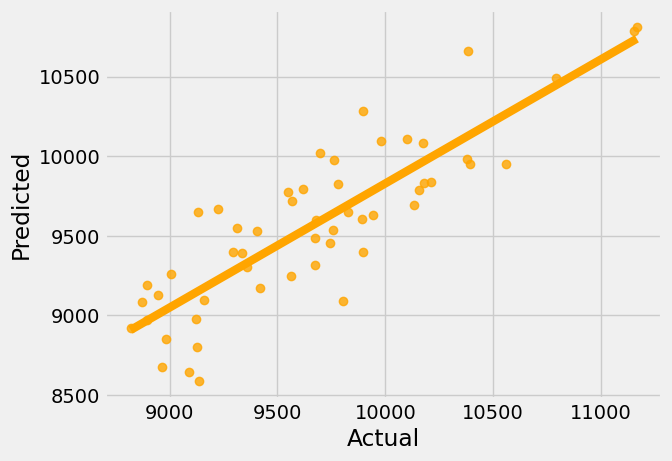

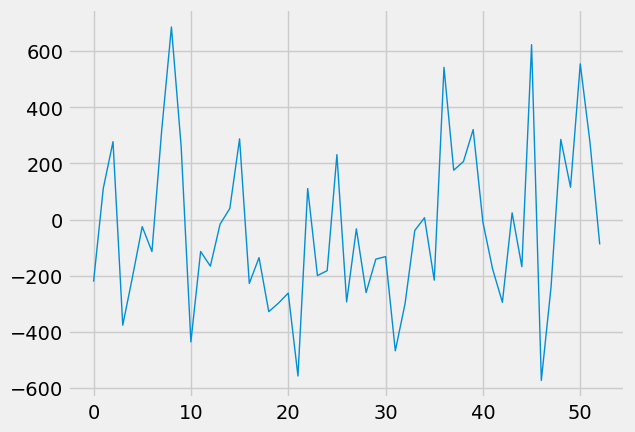

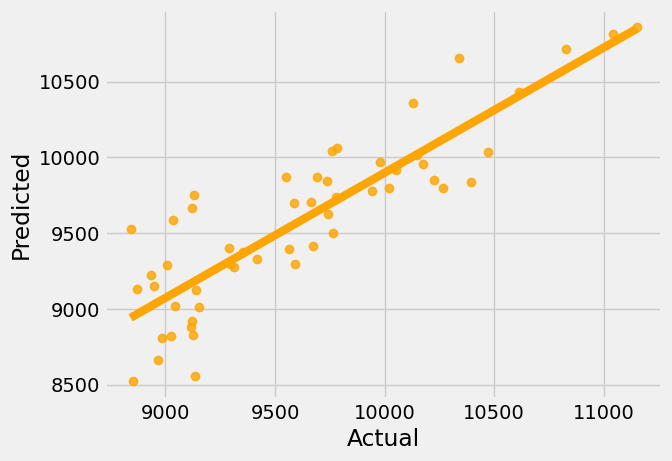

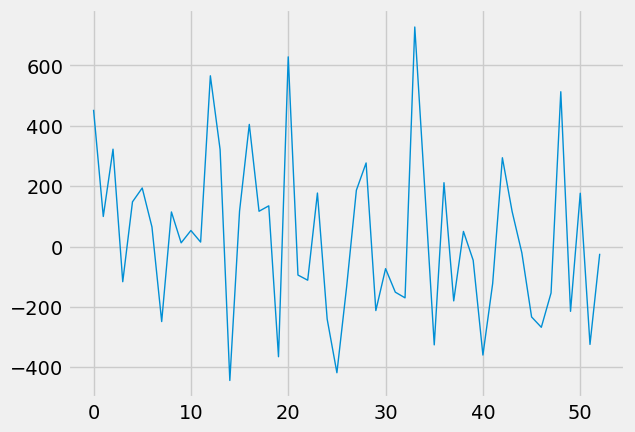

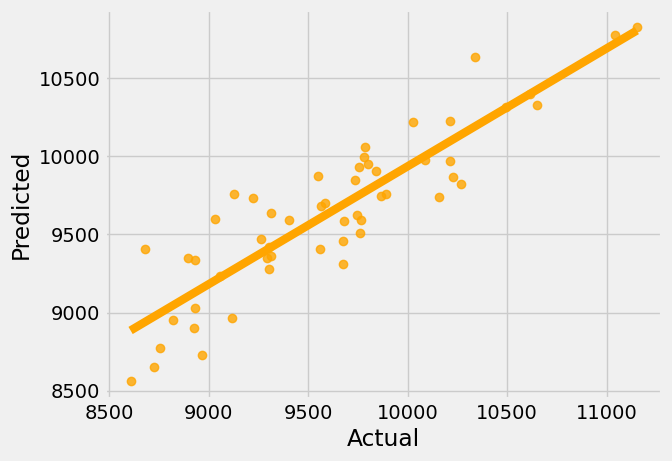

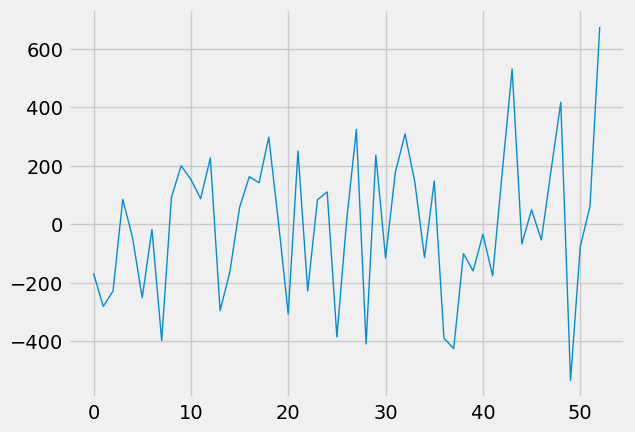

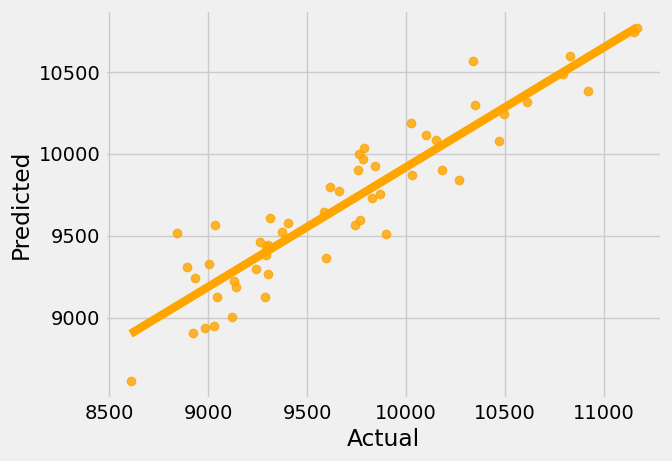


 List of RMSE:
 [315.42762877 286.00025165 272.11449138 320.59173448 327.9987515
 285.83886676 261.32839883 297.7626946  324.86175458 285.75594132
 314.84138279 289.7108062  298.95558101 322.13087295 254.05721803
 298.90574921 301.1506079  254.9748495  318.39032998 281.03103867
 309.94063907 275.53794392 308.77101554 272.27880511 277.01245718
 267.45135292 311.10019802 291.63739008 273.02105263 251.63302893]

 List of R^2:
 [0.70696846 0.78913551 0.79022952 0.74186536 0.71348214 0.74523734
 0.81133564 0.72121457 0.7394321  0.69901318 0.65549983 0.74549486
 0.74870013 0.62867761 0.81759127 0.71143945 0.65031258 0.82520026
 0.75765863 0.78342761 0.74275449 0.75787985 0.6890521  0.80947313
 0.74057061 0.80563311 0.69828367 0.75333179 0.78876842 0.84034368]

 mean_rmse:  291.67376111655193 
 std_rmse: 22.292132939872424

 mean_rsq: 0.7469335626785456 
 std_rsq: 0.052548560939347684


In [35]:
max_exp = 30
rmse_list = np.zeros(max_exp)
rsq_list = np.zeros(max_exp)

for i in range(0,max_exp):

    x_train, x_test, y_train, y_test = get_data(datafile, normalise, i)
    rmse, rsquared, coef, MAPE = scikit_linear_mod(x_train, x_test, y_train, y_test)

    rmse_list[i] = rmse
    rsq_list[i] = rsquared 


print('\n List of RMSE:\n', rmse_list)
# Explained variance score: 1 is perfect prediction 
print('\n List of R^2:\n', rsq_list)

mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)

mean_rsq = np.mean(rsq_list)
std_rsq = np.std(rsq_list)

print('\n mean_rmse: ', mean_rmse, '\n std_rmse:', std_rmse)
print('\n mean_rsq:', mean_rsq, '\n std_rsq:', std_rsq )


### Linear Model (Peak Demand with Degree Days) with regularisation, Random Forest Regressor and Gradient Boosting Regressor model 

In [36]:
X1 = peakDemand_w_DD.iloc[:,[0,2,3]].values
transformer = MinMaxScaler().fit(X1)  # fit does nothing.
X1 = transformer.transform(X1)
y1 = peakDemand_w_DD.iloc[:, 1].values

In [37]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [38]:
pipelines={
'rf':make_pipeline(RandomForestRegressor(random_state=1)),
'gb':make_pipeline(GradientBoostingRegressor(random_state=1)),
'ridge':make_pipeline(Ridge(random_state=1)),
'lasso':make_pipeline(Lasso(random_state=1)),
'enet':make_pipeline(ElasticNet(random_state=1)),
# 'knn': make_pipeline(KNeighborsRegressor(random_state=42)),
# 'cart': make_pipeline(tree.DecisionTreeRegressor(random_state=42)),
    
}

In [39]:
hyperparagrid={

'rf':{
'randomforestregressor__min_samples_split':[2,4,6],
'randomforestregressor__min_samples_leaf':[1,2,3]
},
    
'gb':{
    'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},

'ridge':{
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'lasso':{
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'enet':{
   'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
}

}

In [40]:
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
    try:
        print('Start training for {}'.format(algo))
        model.fit(X1_train,y1_train)
        fit_models[algo]=model
        #print('{} Train scores-R2:{} Train RMSE:{}'.format(algo,r2_score(y1_train,model), np.sqrt(mean_squared_error(y1_train,model))))
    except NotFittedError as e:
        print(repr(e))


Start training for rf
Start training for gb
Start training for ridge
Start training for lasso
Start training for enet


In [45]:
for algo,model in fit_models.items():
    ymd=model.predict(X1_test)
    print('{} scores-R2:{} RMSE:{} MAPE:{}'.format(algo,r2_score(y1_test,ymd), np.sqrt(mean_squared_error(y1_test,ymd)), mean_absolute_percentage_error(y1_test, ymd)*100))

rf scores-R2:0.8785025872305373 RMSE:240.00144154370466 MAPE:2.021729277824745
gb scores-R2:0.8381198510146624 RMSE:277.0302111307599 MAPE:2.3167464928349046
ridge scores-R2:0.7982021103730055 RMSE:309.3062141738015 MAPE:2.5589899020067866
lasso scores-R2:0.8007158528916289 RMSE:307.3737045955224 MAPE:2.5705701177643214
enet scores-R2:0.7927247374413384 RMSE:313.47583817081045 MAPE:2.5740575897398554


In [46]:
best_model=fit_models['rf']

In [47]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

In [52]:
best_model.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})>

NameError: name 'model_params_' is not defined